In [1]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm_notebook as tqdm
DATA = Path("../data")
BUSINESS = DATA / "business.json"
USER = DATA / "user.json"
REVIEW = DATA / "review.json"
SAVEPATH = DATA / "yelp.csv"
YELP = DATA / "final_yelp.csv"

In [6]:
df = pd.read_csv(YELP)

In [1]:
# Almost all postal codes are good. Remove those that are missing
# and those that have a wierd format
df.dropna(subset=["postal_code"], inplace=True)
df = df[df['postal_code'].apply(lambda x: x.isdigit())]

NameError: name 'df' is not defined

In [17]:
from sklearn.impute import MissingIndicator

In [19]:
indicator = MissingIndicator(missing_values=np.NaN)
indicator = indicator.fit_transform(df)
indicator = pd.DataFrame(indicator)

In [24]:
with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())

lot                            94915
validated                      94915
RestaurantsTakeOut            164684
state                              0
Caters                        198617
trendy                        191007
RestaurantsPriceRange2         86736
dessert                       238573
upscale                       191220
WiFi                          172809
RestaurantsGoodForGroups      178873
WheelchairAccessible          397376
breakfast                     238573
BusinessAcceptsCreditCards    101521
latenight                     238573
Alcohol                       184434
street                         94915
divey                         208659
review_count                       0
RestaurantsAttire             193201
garage                         94868
GoodForKids                   158751
classy                        191007
RestaurantsDelivery           183709
BikeParking                   114988
lunch                         238573
stars                              0
d

In [8]:
df.replace({"True": True, "False": False, "None": np.NaN}, inplace=True)

In [9]:
# columns with non-boolean categorical values:
cols_to_split = ['Alcohol', 'NoiseLevel', 'RestaurantsAttire', 'WiFi']
def clean(x):
    x = str(x)
    if x[0] == 'u':
        x = x[1:]
    if x[0] == "'":
        x = x[1:]
    if x[-1] == "'":
        x = x[:-1]
    return x
new_cat = pd.concat([pd.get_dummies(df[col].apply(clean), prefix=col) for col in cols_to_split], axis=1)
# keep all columns (not n-1) because 0's for all of them indicates that the data was missing (useful info)
business_df = pd.concat([df, new_cat], axis=1)
business_df.drop(cols_to_split, inplace=True, axis=1)
business_df.head()
df = business_df

In [10]:
df = df.fillna(0.5).apply(pd.to_numeric, errors="ignore")

In [11]:
df.isnull().sum().sum()

0

In [21]:
df.drop(columns=['state', 'city'], inplace=True)

In [27]:
df.Alcohol_beer_and_wine

0         0
1         0
2         0
3         0
4         0
         ..
499995    0
499996    0
499997    0
499998    1
499999    0
Name: Alcohol_beer_and_wine, Length: 499374, dtype: uint8

In [23]:
df.columns

Index(['lot', 'validated', 'RestaurantsTakeOut', 'Caters', 'trendy',
       'RestaurantsPriceRange2', 'dessert', 'upscale',
       'RestaurantsGoodForGroups', 'WheelchairAccessible', 'breakfast',
       'BusinessAcceptsCreditCards', 'latenight', 'street', 'divey',
       'review_count', 'garage', 'GoodForKids', 'classy',
       'RestaurantsDelivery', 'BikeParking', 'lunch', 'stars', 'dinner',
       'is_open', 'longitude', 'touristy', 'RestaurantsReservations',
       'intimate', 'hipster', 'postal_code', 'brunch', 'romantic', 'casual',
       'valet', 'HasTV', 'RestaurantsTableService', 'OutdoorSeating',
       'latitude', 'compliment_plain', 'useful', 'compliment_writer', 'funny',
       'compliment_profile', 'compliment_cute', 'compliment_funny',
       'compliment_note', 'fans', 'compliment_photos', 'compliment_cool',
       'compliment_hot', 'cool', 'review_count.1', 'average_stars',
       'compliment_more', 'friends', 'compliment_list', 'time', 'rating',
       'Alcohol_beer_and

In [26]:
df.to_csv(DATA/"yelp_v2.csv", index=False)

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

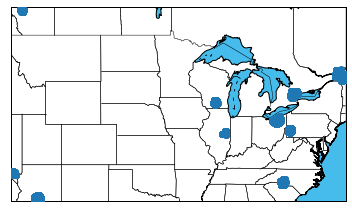

In [18]:


# decide map range based on min and max latitude/longitudes
margin = .01
lat_min = min(df['latitude'].values) - margin
lat_max = max(df['latitude'].values) + margin
lon_min = min(df['longitude'].values) - margin
lon_max = max(df['longitude'].values) + margin

# create map
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max - lon_min)/2,
            projection='merc',
            resolution='h',
            area_thresh=10000.)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='white', lake_color='#46bcec')
lons, lats = m(df['longitude'].values, df['latitude'].values)

# plot points colored by neighborhood
#col = business_df['neighborhood'].replace({u'': 'b'})
#color_labels = df['neighborhood'].unique()
#rgb_values = sns.color_palette("Set2", len(color_labels))
#color_map = dict(zip(color_labels, rgb_values))
m.scatter(lons, lats, marker='o', zorder=5)
plt.show()

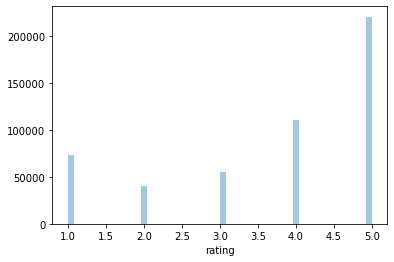

In [63]:
sns.distplot(df['rating'], kde=False);

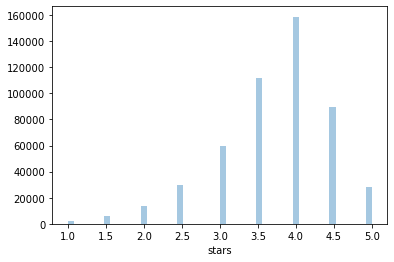

In [64]:
sns.distplot(df['stars'], kde=False)

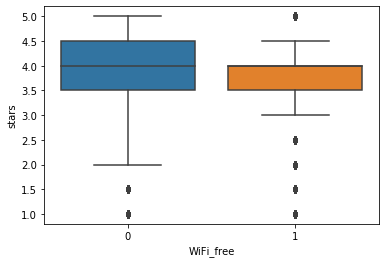

In [19]:
sns.boxplot(x='WiFi_free', y='stars', data=df)

In [77]:
for col in df.columns:
    categories = df[col].unique()
    if len(categories) > 3:
        print(col, categories[:3], len(categories))

state ['NV' 'AZ' 'AB'] 17
RestaurantsPriceRange2 [0.5 2.  1. ] 5
WiFi [0.5 "u'no'" "u'free'"] 7
Alcohol [0.5 "'full_bar'" "u'none'"] 7
review_count [238  66  39] 498
RestaurantsAttire [0.5 "'casual'" "u'casual'"] 7
stars [2.5 4.5 3.5] 9
longitude [-115.2487979 -115.1538714 -111.7902029] 17793
postal_code ['89128' '89169' '85286'] 4256
NoiseLevel [0.5 "u'average'" "u'quiet'"] 9
city ['Las Vegas' 'Chandler' 'Calgary'] 485
latitude [36.2155456 36.1100828 33.2597022] 17970
compliment_plain [ 0 12  1] 1195
useful [ 18 178  13] 3894
compliment_writer [ 0  2 79] 705
funny [ 4 36  1] 2783
compliment_profile [ 0  1 25] 292
compliment_cute [0 1 5] 264
compliment_funny [  0  10 280] 1238
compliment_note [0 7 1] 759
fans [0 3 1] 527
compliment_photos [ 0  1 67] 668
compliment_cool [  0  10 280] 1238
compliment_hot [  0  11 151] 1051
cool [ 0 67  1] 3155
review_count.1 [238  66  39] 498
average_stars [2.   3.97 4.27] 396
compliment_more [ 0  2 33] 302
friends [ 1 52  2] 2081
compliment_list [0 5 4]

In [78]:
from sklearn.preprocessing import *

In [81]:
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])